In [2]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results



(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('Training Data Qty:', len(train_data))
print('Testing Data Qty:', len(test_data))


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Training Data Qty: 8982
Testing Data Qty: 2246
Epoch 1/20
16/16 [==============================] - 1s 52ms/step - loss: 3.1058 - accuracy: 0.4569 - val_loss: 1.6823 - val_accuracy: 0.6670
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.4341 - accuracy: 0.7115 - val_loss: 1.2586 - val_accuracy: 0.7370
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.0452 - accuracy: 0.7838 - val_loss: 1.0967 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8025 - accuracy: 0.8297 - val_loss: 1.0192 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6352 - accuracy: 0.8667 - val_loss: 0.9366 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.4909 - accuracy: 0.9002 - val_loss: 0.9268 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.4156 - accuracy: 0.9148 - val_lo

In [3]:
print(train_data[10])

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
557056/550378 [==============================] - 0s 0us/step
3


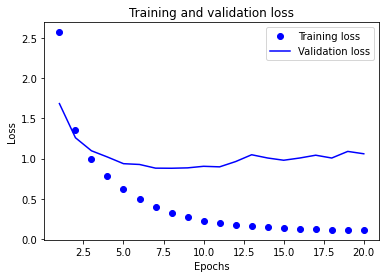

In [4]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

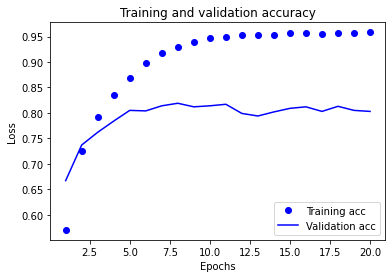

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.1234 - accuracy: 0.4323 - val_loss: 1.7032 - val_accuracy: 0.6630
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4706 - accuracy: 0.7075 - val_loss: 1.3019 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 1.0850 - accuracy: 0.7652 - val_loss: 1.1443 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 35ms/step - loss: 0.8485 - accuracy: 0.8193 - val_loss: 1.0454 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 1s 36ms/step - loss: 0.6864 - accuracy: 0.8539 - val_loss: 0.9787 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.5244 - accuracy: 0.8977 - val_loss: 0.9366 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 34ms/step - loss: 0.4246 - accuracy: 0.9153 - val_loss: 0.9196 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [9]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19545859305431879

In [10]:
predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

(46,)
1.0
3


In [17]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

x_val = x_train[:1000]
partial_x_train_2 = x_train[1000:]
y_val = y_train[:1000]
partial_y_train_2 = y_train[1000:]


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train_2, partial_y_train_2, epochs=9, batch_size=512, validation_data=(x_val, y_val))

new_results = model.evaluate(x_test, y_test)
print(new_results)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 3.1454 - accuracy: 0.3874 - val_loss: 1.8088 - val_accuracy: 0.6340
Epoch 2/9
16/16 [==============================] - 1s 35ms/step - loss: 1.5579 - accuracy: 0.7008 - val_loss: 1.3569 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 1.1298 - accuracy: 0.7661 - val_loss: 1.1604 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 36ms/step - loss: 0.8714 - accuracy: 0.8156 - val_loss: 1.0571 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 1s 35ms/step - loss: 0.6935 - accuracy: 0.8526 - val_loss: 0.9799 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5677 - accuracy: 0.8837 - val_loss: 0.9421 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 0.4527 - accuracy: 0.9063 - val_loss: 0.9256 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===